**Numerical verification of decoupling for small angular acceleration**

In [1]:
import sys
sys.path.append('../..')

import numpy as np
from wobble.rb_simple import SimpleRB
from wobble.rb_coupled import CoupledRB
import matplotlib.pyplot as plt

In [2]:
sim=SimpleRB('Double_RB', 3, 0.1, 200,
                 mesh_file='../sample_data_files/mesh_files/beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                num_modes=10,
                force_path='../sample_data_files/force_files/pure_rotation_100.txt')

sim.set_up()
sim.set_initial_conditions()
sim.handle_forces(eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv')
sim.solve_system()
sim.get_total_displacement_vectors(scale_factor=1)

In [3]:
cup=CoupledRB('Double_RB', 3, 0.1, 200,
                 mesh_file='../sample_data_files/mesh_files/beam.msh',
                 material_file='../sample_data_files/material_files/steel.dat',
                num_modes=10,
                force_path='../sample_data_files/force_files/pure_rotation_100.txt')

cup.set_up()
cup.set_initial_conditions()
cup.handle_forces(eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv')
cup.solve_system()
cup.get_total_displacement_vectors(scale_factor=1)

In [4]:
sim.get_rotation_angles()
cup.get_rotation_angles()

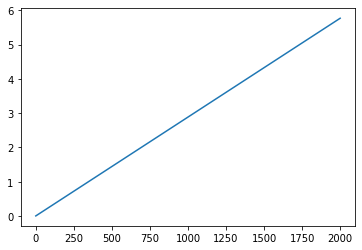

In [5]:
plt.plot(np.sqrt((cup.rb_omega**2).sum(axis=0)))

In [6]:
alpha=np.max(np.sqrt((cup.rb_omega**2).sum(axis=0))/(2000*0.1))
print(alpha)

0.028846183250150717


In [7]:
errs=np.sqrt(((sim.displacement_vectors-cup.displacement_vectors)**2).sum(axis=0))

In [8]:
omega_max=np.sqrt((cup.rb_omega**2).sum(axis=0))[-1]
print(omega_max)

5.769236650030144


In [9]:
t1=sim.time_array[np.where(errs>10**-6)][0]
print(t1)

65.8


In [10]:
omega1=np.sqrt((cup.rb_omega**2).sum(axis=0))[np.where(errs>10**-6)][0]
print(omega1)

1.8980769446575865


In [11]:
t2=sim.time_array[np.where(errs>5*10**-2)][0]
print(t2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
omega2=np.sqrt((cup.rb_omega**2).sum(axis=0))[np.where(errs>5*10**-2)][0]
print(omega2)